In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [12]:
def calculate_slope(point1, point2):
    # Calculate the slope between two points
    delta_y = point2[1] - point1[1]
    delta_x = point2[0] - point1[0]

    # Avoid division by zero
    if delta_x != 0:
        slope = delta_y / delta_x
    else:
        slope = np.inf

    return slope

def calculate_rotation_angle(point1, point2):
    # Calculate the angle between the line connecting the two points and the horizontal axis
    delta_y = point2[1] - point1[1]
    delta_x = point2[0] - point1[0]

    # Calculate the angle using arctan
    angle = np.arctan(delta_y, delta_x)

    return angle

def rotate_image(image, angle, center):

    # Get the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Perform the rotation
    rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

    return rotated_image

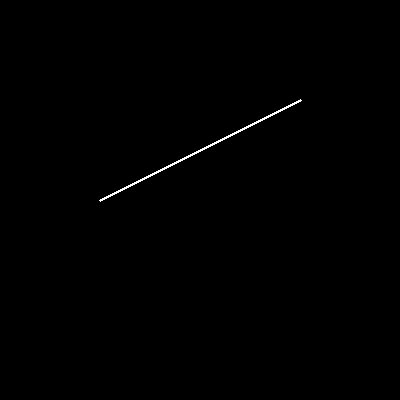

In [14]:
# Create a NumPy array filled with zeros of shape (600, 600)
image = np.zeros((400, 400))

# Define the two points in pixel coordinates
point1 = (100, 200)  # Example point 1
point2 = (300, 100)  # Example point 2

# Draw a white line on the image from point 1 to point 2
color = (255, 255, 255)  # White color
thickness = 2  # Line thickness
image_with_line = cv2.line(image, point1, point2, color, thickness)

# Display the original image
cv2_imshow(image)

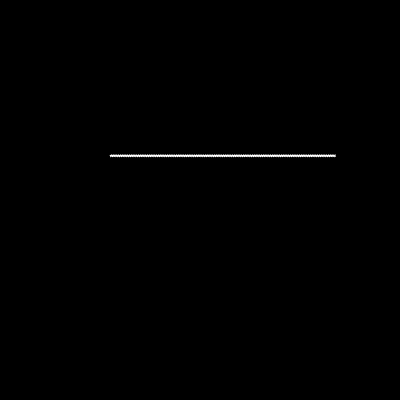

In [16]:
# Calculate the slope between the two points
slope = calculate_slope(point1, point2)

# Calculate the angle to rotate the image so that the line becomes horizontal
angle = np.arctan(slope)

# Turn to degrees
angle = np.degrees(angle)

center = (image.shape[1] // 2, image.shape[0] // 2)

# Rotate the image
rotated_image = rotate_image(image, angle, center)

# Display the rotated image
cv2_imshow(rotated_image)